In [1]:
import pandas as pd
import sklearn
import numpy as np
import util
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [5]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm 
import matplotlib.pylab as plt 
from dmba import regressionSummary, exhaustive_search 
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import backward_elimination, forward_selection

In [6]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', 81)

In [7]:
ultimate_df = pd.read_csv('Data/Created Datasets/ALL_merge_truncate3.csv', index_col = 0)

In [8]:
ultimate_df['LIGHT'] = ultimate_df['LIGHT'].apply(util.lc)
ultimate_df['TRAFFCTL'] = ultimate_df['TRAFFCTL'].apply(util.tc)
ultimate_df['DRIVACT'] = ultimate_df['DRIVACT'].apply(util.actc)
ultimate_df['DRIVCOND'] = ultimate_df['DRIVCOND'].apply(util.condc)
ultimate_df['VEHTYPE'] = ultimate_df['VEHTYPE'].apply(util.vehc)
ultimate_df['INVAGE'] = ultimate_df['INVAGE'].apply(util.agec)
ultimate_df['MANOEUVER'] = ultimate_df['MANOEUVER'].apply(util.manc)

In [9]:
ultimate_df.isna().sum()

IncidentsTotal       2827
SeverityScore        2827
PercentOfVehicles       0
AvgAcceleration         0
PercentCar              0
PercentMPV              0
PercentLDT              0
PercentMDT              0
PercentHDT              0
PercentOther            0
LATITUDE                0
LONGITUDE               0
COUNT                   0
INVAGE                  0
WARDNUM                 0
RDSFCOND                0
VISIBILITY              0
LIGHT                   0
TRAFFCTL                0
VEHTYPE                 0
DRIVACT                 0
DRIVCOND                0
SPEEDING                0
AG_DRIV                 0
ALCOHOL                 0
DISABILITY              0
REDLIGHT                0
MANOEUVER               0
dtype: int64

In [10]:
# TREATING ACTUAL NULLS INTRODUCED BECAUSE OF THE RIGHT MERGE OF HAZARDOUS WITH ROAD IMPEDIMENTS
# THOSE VALUES WILL BECOME 0s SINCE THERE WERE NO HARSH BREAKING INCIDENTS AT THOSE PLACES

ultimate_df.fillna(0, inplace = True)

In [11]:
ultimate_df.isna().sum()

IncidentsTotal       0
SeverityScore        0
PercentOfVehicles    0
AvgAcceleration      0
PercentCar           0
PercentMPV           0
PercentLDT           0
PercentMDT           0
PercentHDT           0
PercentOther         0
LATITUDE             0
LONGITUDE            0
COUNT                0
INVAGE               0
WARDNUM              0
RDSFCOND             0
VISIBILITY           0
LIGHT                0
TRAFFCTL             0
VEHTYPE              0
DRIVACT              0
DRIVCOND             0
SPEEDING             0
AG_DRIV              0
ALCOHOL              0
DISABILITY           0
REDLIGHT             0
MANOEUVER            0
dtype: int64

In [12]:
print(ultimate_df['DRIVCOND'].unique())
print(ultimate_df['DRIVACT'].unique())
print(ultimate_df['LIGHT'].unique())
print(ultimate_df['TRAFFCTL'].unique())
print(ultimate_df['VEHTYPE'].unique())
print(ultimate_df['INVAGE'].unique())
print(ultimate_df['MANOEUVER'].unique())

['Inattentive' 'Normal' 'Ability Impaired (Drugs/Alcohol)' 'Unknown'
 '<Null>' 'Medical or Physical Disability' 'Fatigue' 'Other']
['Driving Properly' 'Failed to Yield Right of Way' 'Lost control'
 'Disobeyed Traffic Control' 'Other' 'Speed too Fast For Condition'
 '<Null>' 'Improper Turn' 'Speeding' 'Improper Lane Change'
 'Improper Passing' 'Following too Close' 'Wrong Way on One Way Road']
['Daylight' 'Artificial' 'Dark' 'Dusk' 'Dawn' 'Other']
['No Control' 'Traffic Signal' 'Stop/Yield Sign' 'Streetcar (Stop for)'
 'Pedestrian Crossover' 'Controller present' '<Null>']
['Small-size Vehicle' 'Two Wheeler' 'Medium-size Vehicle'
 'Large-size Vehicle' 'Other']
['Adult' 'Young Adult' 'Senior' 'Super Senior' 'Children']
['Going Ahead' 'Stopped/Slowing/Parked/Disabled' 'Turning'
 'Lane Change/Merge' 'Shoulder/Curb Related Action' 'Reversing'
 'Overtaking' 'Other' 'Unknown' '<Null>']


In [13]:
# WARDNUM is a category. No other way around this problem.
ultimate_df['WARDNUM'].unique()

array(['11', '4', '22', '5', '9', '17', '13', '23', '2', '14', '22,23',
       '11,13', '3', '19', '<Null>', '25', '18', '10', '11,10', '6',
       '10,13', '9,11', '6,18', '12', '2,3', '10,14', '9,12', '18,17',
       '23,25', '3,4', '14,19', '13,14', '20', '1,2', '1', '4,9', '5,9',
       '4,9,10', '17,22', '4,10', '24,25', '9,10', '12,11', '9,11,10',
       '24', '11,10,13', '9,12,11', '21', '16', '7', '15', '20,24', '7,6',
       '8,15', '21,20', '8', '15,16', '16,20', '8,12', '19,20', '11,15',
       '23,24', '21,24', '16,21', '12,15', '8,9', '8,9,12', '1,7',
       '16,19,20', '16,19'], dtype=object)

In [14]:
ultimate_df = ultimate_df.replace('Yes', 1).replace('<Null>', 0).replace('<Null', 0)

In [15]:
ultimate_df.head()

,IncidentsTotal,SeverityScore,PercentOfVehicles,AvgAcceleration,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,LATITUDE,LONGITUDE,COUNT,INVAGE,WARDNUM,RDSFCOND,VISIBILITY,LIGHT,TRAFFCTL,VEHTYPE,DRIVACT,DRIVCOND,SPEEDING,AG_DRIV,ALCOHOL,DISABILITY,REDLIGHT,MANOEUVER
0,0.0,0.0,0.012,0.320,0.059,0.220,0.333,0.081,0.116,0.191,43.676,-79.397,1,Adult,11,Dry,Clear,Daylight,No Control,Small-size Vehicle,Driving Properly,Inattentive,0,1,0,0,0,Going Ahead
1,0.0,0.0,0.035,0.680,0.025,0.172,0.345,0.094,0.197,0.167,43.651,-79.445,2,Adult,4,Dry,Clear,Daylight,No Control,Small-size Vehicle,Failed to Yield Right of Way,Normal,0,0,0,0,0,Going Ahead
2,0.0,0.0,0.059,0.124,0.000,0.647,0.353,0.000,0.000,0.000,43.808,-79.321,1,Adult,22,Dry,Clear,Daylight,No Control,Small-size Vehicle,Driving Properly,Normal,0,0,0,0,0,Going Ahead
3,0.0,0.0,0.005,0.274,0.022,0.118,0.353,0.073,0.237,0.197,43.685,-79.481,1,Adult,5,Dry,Clear,Daylight,Traffic Signal,Small-size Vehicle,Driving Properly,Normal,1,1,0,0,0,Going Ahead
4,0.0,0.0,0.023,0.403,0.028,0.193,0.363,0.069,0.150,0.198,43.682,-79.445,1,Young Adult,9,Dry,Clear,Artificial,No Control,Small-size Vehicle,Lost control,Normal,0,1,0,0,0,Going Ahead


In [24]:
X = ultimate_df[[col for col in ultimate_df.columns if col not in ('COUNT', 'WARDNUM')]]


X = pd.get_dummies(X)

# need to remove the columns with 0s in their names
# the columns with 0 in their names are the ones which are structural zeros/not applicables

X = X[[col for col in X.columns if '0' not in col]]

In [17]:
X.shape

(3323, 81)

In [25]:
X

,IncidentsTotal,SeverityScore,PercentOfVehicles,AvgAcceleration,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,LATITUDE,LONGITUDE,SPEEDING,AG_DRIV,ALCOHOL,DISABILITY,REDLIGHT,INVAGE_Adult,INVAGE_Children,INVAGE_Senior,INVAGE_Super Senior,INVAGE_Young Adult,RDSFCOND_Dry,RDSFCOND_Ice,RDSFCOND_Loose Sand or Gravel,RDSFCOND_Loose Snow,RDSFCOND_Other,RDSFCOND_Packed Snow,RDSFCOND_Slush,RDSFCOND_Wet,VISIBILITY_Clear,VISIBILITY_Drifting Snow,"VISIBILITY_Fog, Mist, Smoke, Dust",VISIBILITY_Freezing Rain,VISIBILITY_Other,VISIBILITY_Rain,VISIBILITY_Snow,VISIBILITY_Strong wind,LIGHT_Artificial,LIGHT_Dark,LIGHT_Dawn,LIGHT_Daylight,LIGHT_Dusk,LIGHT_Other,TRAFFCTL_Controller present,TRAFFCTL_No Control,TRAFFCTL_Pedestrian Crossover,TRAFFCTL_Stop/Yield Sign,TRAFFCTL_Streetcar (Stop for),TRAFFCTL_Traffic Signal,VEHTYPE_Large-size Vehicle,VEHTYPE_Medium-size Vehicle,VEHTYPE_Other,VEHTYPE_Small-size Vehicle,VEHTYPE_Two Wheeler,DRIVACT_Disobeyed Traffic Control,DRIVACT_Driving Properly,DRIVACT_Failed to Yield Right of Way,DRIVACT_Following too Close,DRIVACT_Improper Lane Change,DRIVACT_Improper Passing,DRIVACT_Improper Turn,DRIVACT_Lost control,DRIVACT_Other,DRIVACT_Speed too Fast For Condition,DRIVACT_Speeding,DRIVACT_Wrong Way on One Way Road,DRIVCOND_Ability Impaired (Drugs/Alcohol),DRIVCOND_Fatigue,DRIVCOND_Inattentive,DRIVCOND_Medical or Physical Disability,DRIVCOND_Normal,DRIVCOND_Other,DRIVCOND_Unknown,MANOEUVER_Going Ahead,MANOEUVER_Lane Change/Merge,MANOEUVER_Other,MANOEUVER_Overtaking,MANOEUVER_Reversing,MANOEUVER_Shoulder/Curb Related Action,MANOEUVER_Stopped/Slowing/Parked/Disabled,MANOEUVER_Turning,MANOEUVER_Unknown
0,0.0,0.000,0.012,0.320,0.059,0.220,0.333,0.081,0.116,0.191,43.676,-79.397,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.0,0.000,0.035,0.680,0.025,0.172,0.345,0.094,0.197,0.167,43.651,-79.445,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.0,0.000,0.059,0.124,0.000,0.647,0.353,0.000,0.000,0.000,43.808,-79.321,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0.0,0.000,0.005,0.274,0.022,0.118,0.353,0.073,0.237,0.197,43.685,-79.481,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0.0,0.000,0.023,0.403,0.028,0.193,0.363,0.069,0.150,0.198,43.682,-79.445,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,0.0,0.000,0.061,0.603,0.031,0.212,0.512,0.060,0.081,0.103,43.699,-79.519,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3319,7.0,0.009,0.047,0.425,0.004,0.069,0.199,0.085,0.488,0.155,43.699,-79.587,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3320,0.0,0.000,0.074,0.590,0.047,0.245,0.401,0.074,0.123,0.109,43.699,-79.318,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3321,0.0,0.000,0.006,0.462,0.056,0.249,0.346,0.080,0.152,0.118,43.690,-79.292,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
Y = ultimate_df['COUNT']

train_X, valid_X, train_Y, valid_Y =  train_test_split(X, Y, test_size = 0.4, random_state = 1)

In [27]:
param_grid = { 
 'max_depth': [5, 10, 15, 20, 25, 35, 50, 70, 100, 150], 
 'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001], 
 'min_samples_split': [0.1, 0.07, 0.05, 0.01, 0.005] 
} 

In [28]:
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state = 1), param_grid, cv = 5, n_jobs = -1)
gridSearch.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 35, 50, 70, 100, 150],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.1, 0.07, 0.05, 0.01, 0.005]})

In [23]:
gridSearch.best_estimator_

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.05,
                      min_samples_split=0.1, random_state=1)

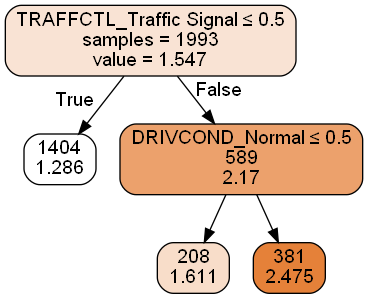

In [29]:
plotDecisionTree(gridSearch.best_estimator_, feature_names = X.columns)

In [42]:
gridSearch.best_estimator_.predict(pred_input)

array([2.47506562])

In [23]:
print(regressionSummary(train_Y, gridSearch.best_estimator_.predict(train_X)))
regressionSummary(valid_Y, gridSearch.best_estimator_.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.9788
            Mean Absolute Error (MAE) : 0.6563
          Mean Percentage Error (MPE) : -21.5331
Mean Absolute Percentage Error (MAPE) : 42.0005
None

Regression statistics

                      Mean Error (ME) : -0.0766
       Root Mean Squared Error (RMSE) : 0.9121
            Mean Absolute Error (MAE) : 0.6349
          Mean Percentage Error (MPE) : -25.4471
Mean Absolute Percentage Error (MAPE) : 43.2063


In [26]:
rf = RandomForestRegressor(n_estimators = 2000, random_state = 1) 
rf.fit(train_X, train_Y) 

RandomForestRegressor(n_estimators=2000, random_state=1)

Text(0.5, 1.0, 'Visualizing Important Features')

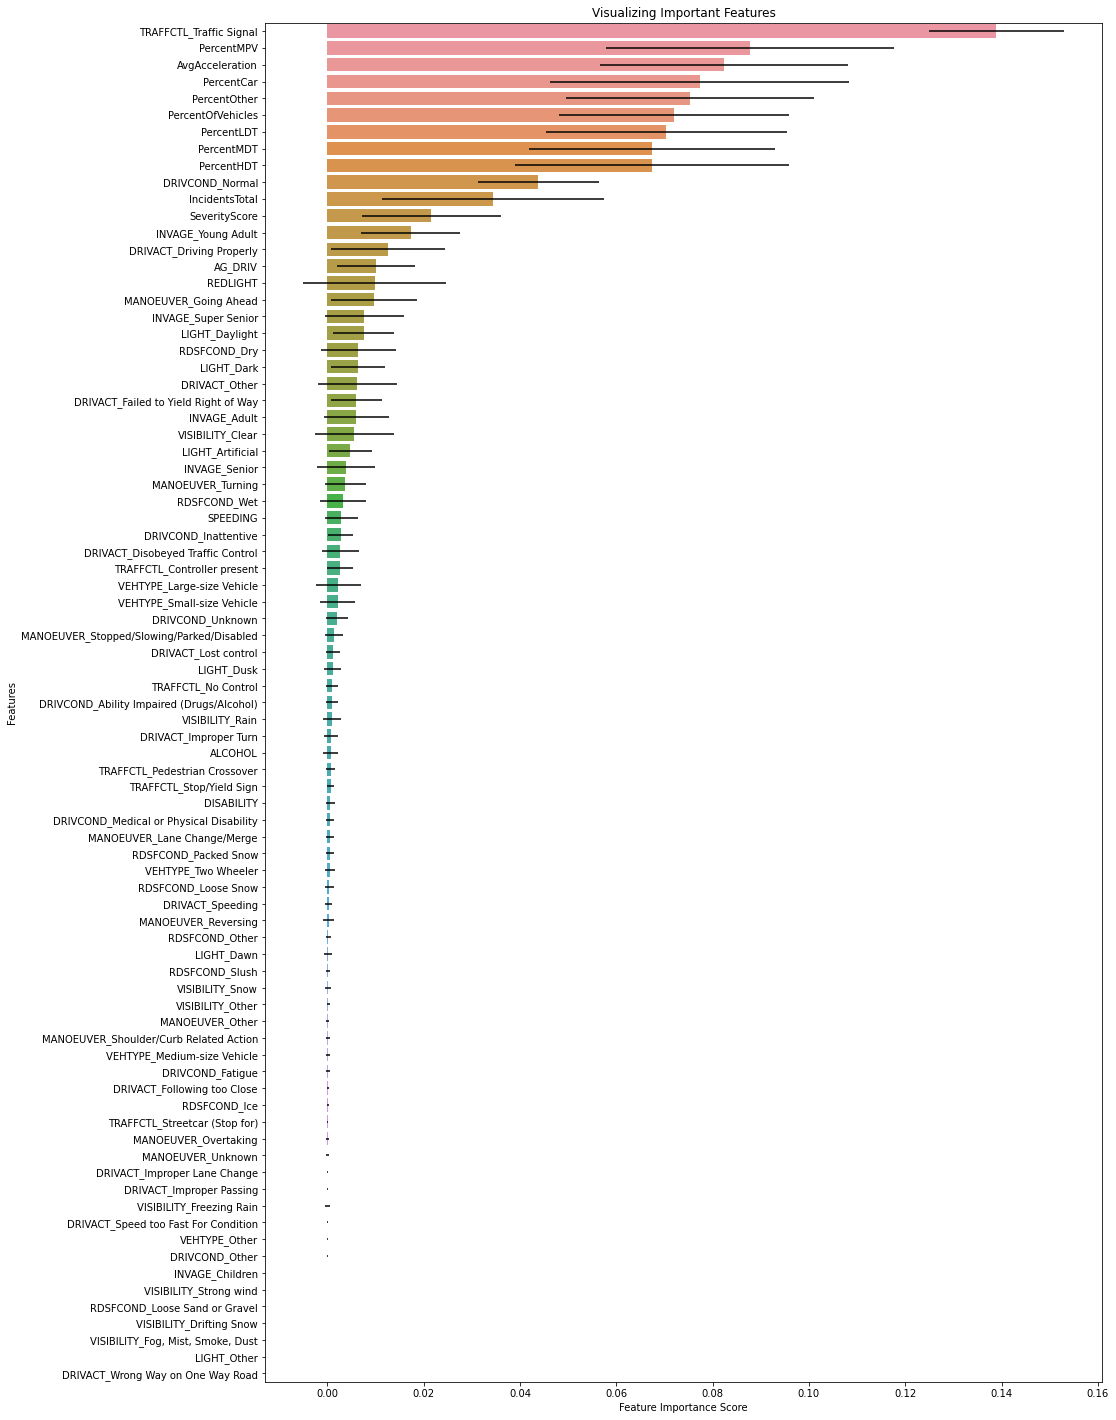

In [29]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) 
tf = pd.DataFrame({'feature': train_X.columns, 'importance': rf.feature_importances_, 'std': std}) 
tf = tf.sort_values('importance', ascending = False)
plt.figure(figsize = (15,25))
sns.barplot(x = tf['importance'], y = tf['feature'], xerr = tf['std'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [30]:
print(regressionSummary(train_Y, rf.predict(train_X)))
regressionSummary(valid_Y, rf.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0262
       Root Mean Squared Error (RMSE) : 0.3643
            Mean Absolute Error (MAE) : 0.2426
          Mean Percentage Error (MPE) : -9.4312
Mean Absolute Percentage Error (MAPE) : 16.0848
None

Regression statistics

                      Mean Error (ME) : -0.1423
       Root Mean Squared Error (RMSE) : 0.8889
            Mean Absolute Error (MAE) : 0.6212
          Mean Percentage Error (MPE) : -28.9343
Mean Absolute Percentage Error (MAPE) : 44.1221


In [43]:
linear_model = LinearRegression()
linear_model.fit(train_X, train_Y)

LinearRegression()

In [44]:
print(regressionSummary(train_Y, linear_model.predict(train_X)))
regressionSummary(valid_Y, linear_model.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.9406
            Mean Absolute Error (MAE) : 0.6216
          Mean Percentage Error (MPE) : -19.0475
Mean Absolute Percentage Error (MAPE) : 41.3817
None

Regression statistics

                      Mean Error (ME) : -0.0751
       Root Mean Squared Error (RMSE) : 0.8779
            Mean Absolute Error (MAE) : 0.6077
          Mean Percentage Error (MPE) : -23.4315
Mean Absolute Percentage Error (MAPE) : 43.0432


In [45]:
pd.DataFrame({'Actual': valid_Y, 'Predicted': linear_model.predict(valid_X)})

,Actual,Predicted
2313,2,1.322053
2573,1,1.056992
3066,1,2.253484
2022,2,1.632716
1605,2,1.316529
...,...,...
1225,1,1.511390
1210,1,0.687314
441,1,1.048132
1342,1,1.223370


In [46]:
valid_X.head(1)

,IncidentsTotal,SeverityScore,PercentOfVehicles,AvgAcceleration,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,LATITUDE,LONGITUDE,SPEEDING,AG_DRIV,ALCOHOL,DISABILITY,REDLIGHT,INVAGE_Adult,INVAGE_Children,INVAGE_Senior,INVAGE_Super Senior,INVAGE_Young Adult,RDSFCOND_Dry,RDSFCOND_Ice,RDSFCOND_Loose Sand or Gravel,RDSFCOND_Loose Snow,RDSFCOND_Other,RDSFCOND_Packed Snow,RDSFCOND_Slush,RDSFCOND_Wet,VISIBILITY_Clear,VISIBILITY_Drifting Snow,"VISIBILITY_Fog, Mist, Smoke, Dust",VISIBILITY_Freezing Rain,VISIBILITY_Other,VISIBILITY_Rain,VISIBILITY_Snow,VISIBILITY_Strong wind,LIGHT_Artificial,LIGHT_Dark,LIGHT_Dawn,LIGHT_Daylight,LIGHT_Dusk,LIGHT_Other,TRAFFCTL_Controller present,TRAFFCTL_No Control,TRAFFCTL_Pedestrian Crossover,TRAFFCTL_Stop/Yield Sign,TRAFFCTL_Streetcar (Stop for),TRAFFCTL_Traffic Signal,VEHTYPE_Large-size Vehicle,VEHTYPE_Medium-size Vehicle,VEHTYPE_Other,VEHTYPE_Small-size Vehicle,VEHTYPE_Two Wheeler,DRIVACT_Disobeyed Traffic Control,DRIVACT_Driving Properly,DRIVACT_Failed to Yield Right of Way,DRIVACT_Following too Close,DRIVACT_Improper Lane Change,DRIVACT_Improper Passing,DRIVACT_Improper Turn,DRIVACT_Lost control,DRIVACT_Other,DRIVACT_Speed too Fast For Condition,DRIVACT_Speeding,DRIVACT_Wrong Way on One Way Road,DRIVCOND_Ability Impaired (Drugs/Alcohol),DRIVCOND_Fatigue,DRIVCOND_Inattentive,DRIVCOND_Medical or Physical Disability,DRIVCOND_Normal,DRIVCOND_Other,DRIVCOND_Unknown,MANOEUVER_Going Ahead,MANOEUVER_Lane Change/Merge,MANOEUVER_Other,MANOEUVER_Overtaking,MANOEUVER_Reversing,MANOEUVER_Shoulder/Curb Related Action,MANOEUVER_Stopped/Slowing/Parked/Disabled,MANOEUVER_Turning,MANOEUVER_Unknown
2313,0.0,0.0,0.028,0.329,0.017,0.213,0.392,0.06,0.17,0.148,43.784,-79.31,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [63]:
pred_input = valid_X.head(1)
#pred_input['AvgAcceleration'] = 1.2
pred_input['DRIVCOND_Ability Impaired (Drugs/Alcohol)'] = 0

<ipython-input-63-3bf3fff92297>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_input['DRIVCOND_Ability Impaired (Drugs/Alcohol)'] = 0


In [64]:
linear_model.predict(pred_input)

array([1.34666554])

In [35]:
pd.DataFrame({'Feature': train_X.columns, 'coefficients': linear_model.coef_}).sort_values(by = 'coefficients', ascending = False)

,Feature,coefficients
1,SeverityScore,9.189802e+00
25,RDSFCOND_Packed Snow,1.597418e+00
26,RDSFCOND_Slush,1.363269e+00
20,RDSFCOND_Dry,1.182045e+00
21,RDSFCOND_Ice,1.154639e+00
23,RDSFCOND_Loose Snow,1.141442e+00
27,RDSFCOND_Wet,1.108377e+00
22,RDSFCOND_Loose Sand or Gravel,1.071900e+00
24,RDSFCOND_Other,8.512427e-01
41,LIGHT_Other,3.458542e-01


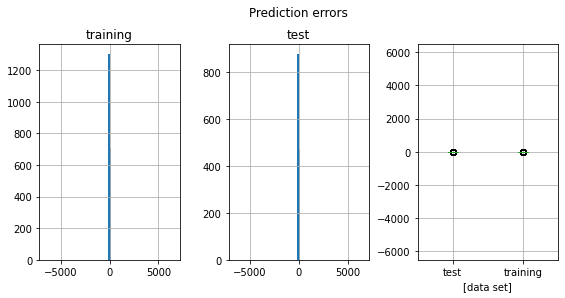

In [120]:
pred_error_train = pd.DataFrame({ 
 'residual': train_Y - linear_model.predict(train_X), 
 'data set': 'training' 
}) 
pred_error_test = pd.DataFrame({ 
 'residual': valid_Y - linear_model.predict(valid_X), 
 'data set': 'test' 
}) 

boxdata_df = pred_error_train.append(pred_error_test, ignore_index=True) 
fig, axes = plt.subplots(nrows=1, ncols=3) 
fig.set_size_inches(9, 4) 
common = {'bins': 100, 'range': [-6500, 6500]} 
pred_error_train.hist(ax=axes[0], **common) 
pred_error_test.hist(ax=axes[1], **common) 
boxdata_df.boxplot(ax=axes[2], by = 'data set') 
axes[0].set_title('training') 
axes[1].set_title('test') 
axes[2].set_title(' ') 
axes[2].set_ylim(-6500, 6500) 
plt.suptitle('Prediction errors') 
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35) 
#plt.show() 

In [36]:
# these helper functions have been obtained from the book. but it must be noted that there is a fatal flaw with them
# they assume the existence of a train_Y - not good practice, and will probably throw errors if shared with others

def train_model(variables): 
    if len(variables) == 0: 
        return None 
    model = LinearRegression() 
    model.fit(train_X[variables], train_Y) 
    return model 
    
def score_model(model, variables): 
    if len(variables) == 0: 
        return AIC_score(train_Y, [train_Y.mean()] * len(train_Y), model, df=1) 
    return AIC_score(train_Y, model.predict(train_X[variables]), model) 

In [37]:
forwards_model, best_variables_forward = forward_selection(train_X.columns, train_model, score_model, verbose = True)

Variables: IncidentsTotal, SeverityScore, PercentOfVehicles, AvgAcceleration, PercentCar, PercentMPV, PercentLDT, PercentMDT, PercentHDT, PercentOther, SPEEDING, AG_DRIV, ALCOHOL, DISABILITY, REDLIGHT, INVAGE_Adult, INVAGE_Children, INVAGE_Senior, INVAGE_Super Senior, INVAGE_Young Adult, RDSFCOND_Dry, RDSFCOND_Ice, RDSFCOND_Loose Sand or Gravel, RDSFCOND_Loose Snow, RDSFCOND_Other, RDSFCOND_Packed Snow, RDSFCOND_Slush, RDSFCOND_Wet, VISIBILITY_Clear, VISIBILITY_Drifting Snow, VISIBILITY_Fog, Mist, Smoke, Dust, VISIBILITY_Freezing Rain, VISIBILITY_Other, VISIBILITY_Rain, VISIBILITY_Snow, VISIBILITY_Strong wind, LIGHT_Artificial, LIGHT_Dark, LIGHT_Dawn, LIGHT_Daylight, LIGHT_Dusk, LIGHT_Other, TRAFFCTL_Controller present, TRAFFCTL_No Control, TRAFFCTL_Pedestrian Crossover, TRAFFCTL_Stop/Yield Sign, TRAFFCTL_Streetcar (Stop for), TRAFFCTL_Traffic Signal, VEHTYPE_Large-size Vehicle, VEHTYPE_Medium-size Vehicle, VEHTYPE_Other, VEHTYPE_Small-size Vehicle, VEHTYPE_Two Wheeler, DRIVACT_Disobey

In [39]:
pd.DataFrame({'Feature': best_variables_forward, 'coefficients': forwards_model.coef_}).sort_values(by = 'coefficients', ascending = False)

,Feature,coefficients
8,SeverityScore,8.193605
0,TRAFFCTL_Traffic Signal,0.839258
10,PercentOther,0.736606
12,TRAFFCTL_Controller present,0.484927
3,VISIBILITY_Clear,0.318127
7,VEHTYPE_Small-size Vehicle,0.278046
1,DRIVCOND_Normal,0.268476
2,MANOEUVER_Going Ahead,0.265648
6,INVAGE_Young Adult,0.236067
13,DRIVACT_Lost control,-0.111134
